In [2]:
import requests

data_bucket = "janelia-neuronbridge-data-prod"

data_url_prefix = f"https://{data_bucket}.s3.us-east-1.amazonaws.com/"

url = data_url_prefix + "current.txt"
res = requests.get(url)
if res.status_code != 200:
    raise Exception("Could not retrieve "+url)

version = res.text.rstrip()
print(version)

url = data_url_prefix + version + "/config.json"
res = requests.get(url)
if res.status_code != 200:
    raise Exception("Could not retrieve "+url)
    
config = res.json()
print(config)



v2_4_0
{'imageryBaseURL': 'https://s3.amazonaws.com/janelia-flylight-color-depth', 'thumbnailsBaseURLs': 'https://s3.amazonaws.com/janelia-flylight-color-depth-thumbnails', 'pppImageryBaseURL': 'https://s3.amazonaws.com/janelia-ppp-match-prod', 'swcBaseURL': 'https://s3.amazonaws.com/janelia-flylight-color-depth/SWC', 'anatomicalRegions': [{'label': 'Brain', 'value': 'brain'}, {'label': 'VNC', 'value': 'vnc', 'disabled': True}]}


In [3]:

body_id = 1001453586
url = f"{data_url_prefix}{version}/metadata/by_body/{body_id}.json"
res = requests.get(url)

if res.status_code != 200:
    raise Exception("Could not retrieve "+url)

body_obj = res.json()
    
print(body_obj)

image_url_suffix = body_obj['results'][0]['imageURL']


{'results': [{'id': '2943465148721623051', 'publishedName': '1001453586', 'libraryName': 'FlyEM_Hemibrain_v1.2.1', 'imageURL': 'JRC2018_Unisex_20x_HR/FlyEM_Hemibrain_v1.2.1/1001453586-JRC2018_Unisex_20x_HR-CDM.png', 'thumbnailURL': 'JRC2018_Unisex_20x_HR/FlyEM_Hemibrain_v1.2.1/1001453586-JRC2018_Unisex_20x_HR-CDM.jpg', 'neuronType': "KCa'b'-ap1", 'neuronInstance': "KCa'b'-ap1_R", 'gender': 'f'}]}


https://s3.amazonaws.com/janelia-flylight-color-depth/JRC2018_Unisex_20x_HR/FlyEM_Hemibrain_v1.2.1/1001453586-JRC2018_Unisex_20x_HR-CDM.png


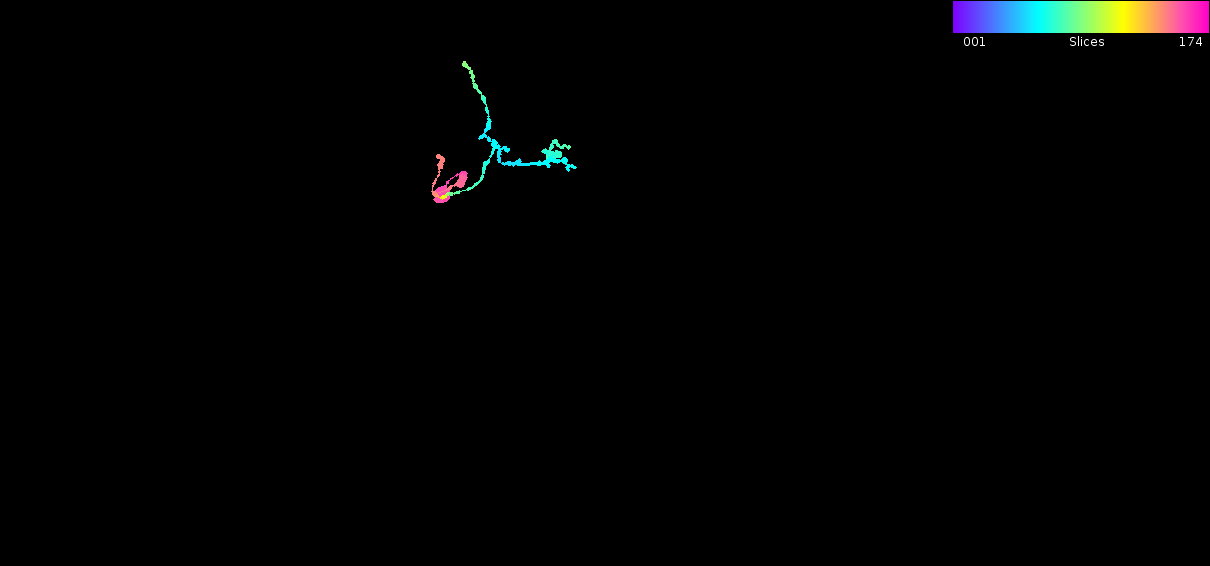

In [4]:
from PIL import Image

imagery_url_prefix = config['imageryBaseURL']
url = imagery_url_prefix + '/' + image_url_suffix
print(url)

im = Image.open(requests.get(url, stream=True).raw)

im


In [5]:


line_id = 'LH1000'
url = f"{data_url_prefix}{version}/metadata/by_line/{line_id}.json"
res = requests.get(url)

if res.status_code != 200:
    raise Exception("Could not retrieve "+url)

body_obj = res.json()
print(body_obj)

image_url_suffix = body_obj['results'][0]['imageURL']



{'results': [{'id': '2711778365282451467', 'publishedName': 'LH1000', 'libraryName': 'FlyLight Split-GAL4 Drivers', 'imageURL': 'JRC2018_Unisex_20x_HR/FlyLight_Split-GAL4_Drivers/LH1000-20151106_52_J3-Split_GAL4-f-20x-brain-JRC2018_Unisex_20x_HR-CDM_1.png', 'thumbnailURL': 'JRC2018_Unisex_20x_HR/FlyLight_Split-GAL4_Drivers/LH1000-20151106_52_J3-Split_GAL4-f-20x-brain-JRC2018_Unisex_20x_HR-CDM_1.jpg', 'slideCode': '20151106_52_J3', 'objective': '20x', 'gender': 'f', 'anatomicalArea': 'Brain', 'alignmentSpace': 'JRC2018_Unisex_20x_HR', 'channel': '1', 'mountingProtocol': 'DPX PBS Mounting'}, {'id': '2798489189987909643', 'publishedName': 'LH1000', 'libraryName': 'FlyLight Split-GAL4 Drivers', 'imageURL': 'JRC2018_Unisex_20x_HR/FlyLight_Split-GAL4_Drivers/LH1000-20160928_31_C1-Split_GAL4-f-63x-brain-JRC2018_Unisex_20x_HR-CDM_2.png', 'thumbnailURL': 'JRC2018_Unisex_20x_HR/FlyLight_Split-GAL4_Drivers/LH1000-20160928_31_C1-Split_GAL4-f-63x-brain-JRC2018_Unisex_20x_HR-CDM_2.jpg', 'slideCode':

https://s3.amazonaws.com/janelia-flylight-color-depth/JRC2018_Unisex_20x_HR/FlyLight_Split-GAL4_Drivers/LH1000-20151106_52_J3-Split_GAL4-f-20x-brain-JRC2018_Unisex_20x_HR-CDM_1.png


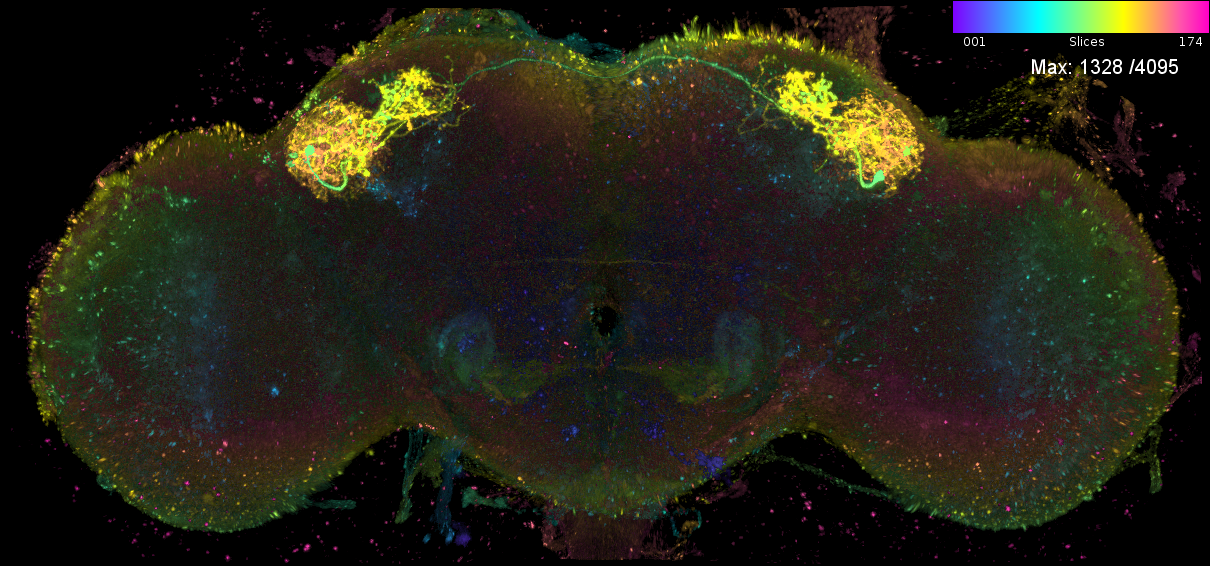

In [6]:
from PIL import Image

imagery_url_prefix = config['imageryBaseURL']
url = imagery_url_prefix + '/' + image_url_suffix
print(url)

im = Image.open(requests.get(url, stream=True).raw)

im

In [7]:
image_id = body_obj['results'][0]['id']

url = f"{data_url_prefix}{version}/metadata/cdsresults/{image_id}.json"
res = requests.get(url)

if res.status_code != 200:
    raise Exception("Could not retrieve "+url)

body_obj = res.json()
print(body_obj)



{'maskId': '2711778365282451467', 'maskPublishedName': 'LH1000', 'maskLibraryName': 'FlyLight Split-GAL4 Drivers', 'maskSampleRef': None, 'maskRelatedImageRefId': None, 'maskImageURL': None, 'results': [{'id': '2945073155462377483', 'publishedName': '424716408', 'libraryName': 'FlyEM_Hemibrain_v1.2.1', 'imageURL': 'JRC2018_Unisex_20x_HR/FlyEM_Hemibrain_v1.2.1/424716408-JRC2018_Unisex_20x_HR-CDM.png', 'thumbnailURL': 'JRC2018_Unisex_20x_HR/FlyEM_Hemibrain_v1.2.1/424716408-JRC2018_Unisex_20x_HR-CDM.jpg', 'searchablePNG': '424716408-JRC2018_Unisex_20x_HR-CDM.png', 'neuronType': 'LHAV3k1', 'neuronInstance': 'LHAV3k1_R', 'gender': 'f', 'alignmentSpace': 'JRC2018_Unisex_20x_HR', 'matchingPixels': 247, 'matchingRatio': 0.028545013290188374, 'mirrored': False, 'gradientAreaGap': 0, 'highExpressionArea': 588, 'normalizedGapScore': 29341.685443893646, 'normalizedScore': 29341.685443893646}, {'id': '2945073151527206923', 'publishedName': '361955275', 'libraryName': 'FlyEM_Hemibrain_v1.2.1', 'imag

In [8]:

for result in body_obj['results']:
    print(f"{result['publishedName']} {result['matchingPixels']} {result['normalizedScore']}")


424716408 247 29341.685443893646
361955275 218 29047.100361097313
696795331 318 24274.219337205326
698180486 340 24194.131236853904
572988717 324 23693.021056590707
5813087621 185 22613.21441740413
359581549 186 22556.166097657802
327933008 217 22418.91331427821
5813062781 184 20086.586463019146
425803370 241 18186.565615073207
483021600 277 18069.7619047619
517138678 119 17209.163328268176
516425902 269 17029.428087986464
328543014 239 16886.585871731262
702674134 227 15868.723524013458
543766436 97 15727.395798844864
574351760 133 14343.913135593224
330604760 131 14324.946708066662
360259229 211 14233.623798076922
5813055865 252 14098.552328899805
390579059 199 13516.405577580543
455746581 216 13141.087348023611
361968122 191 12983.160180995475
5901195323 190 12518.449639668357
360246734 191 11577.291247744482
360578907 188 11417.419047619045
422640861 128 10550.505000413257
852993150 87 10052.123548257909
360950551 94 10037.77180623139
5813068669 216 10027.336419042034
5813040093 24

https://s3.amazonaws.com/janelia-flylight-color-depth/JRC2018_Unisex_20x_HR/FlyEM_Hemibrain_v1.2.1/424716408-JRC2018_Unisex_20x_HR-CDM.png


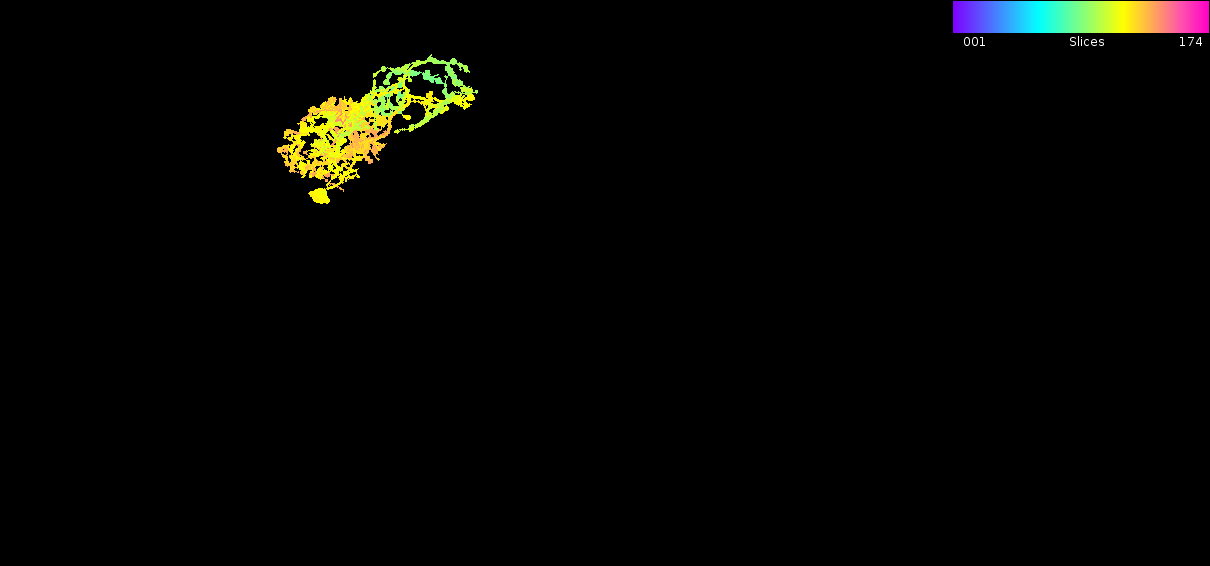

In [9]:
image_url_suffix = body_obj['results'][0]['imageURL']

from PIL import Image

imagery_url_prefix = config['imageryBaseURL']
url = imagery_url_prefix + '/' + image_url_suffix
print(url)

im = Image.open(requests.get(url, stream=True).raw)

im

In [10]:
import requests
from PIL import Image

class Client:
    def __init__(self, data_bucket="janelia-neuronbridge-data-prod", version="current"):
        """
        Client constructor. 
        
        When the client is created, it retrieves the configuration for the specified version. 
        If ``version='current'`` then the latest version is first retrieved from NeuronBridge.
        
        Args:
            data_bucket:
                name of the S3 bucket containing the NeuronBridge metadata
            version:
                version number (e.g. "v2.4.0") or "current" to use the latest version
                
        """

        data_url_prefix = f"https://{data_bucket}.s3.us-east-1.amazonaws.com"

        if version == "current":
            url = data_url_prefix + "/current.txt"
            res = requests.get(url)
            if res.status_code != 200:
                raise Exception("Could not retrieve "+url)
            self.version = res.text.rstrip()
        else:
            self.version = version
            
        self.data_url = f"{data_url_prefix}/{self.version}"
        url = self.data_url + "/config.json"
        res = requests.get(url)
        if res.status_code != 200:
            raise Exception("Could not retrieve "+url)

        self.config = res.json()


    def find_em_body(self, body_id):
        
        url = f"{self.data_url}/metadata/by_body/{body_id}.json"
        res = requests.get(url)

        if res.status_code != 200:
            raise Exception("Could not retrieve "+url)

        return res.json()

    
    def find_lm_line(self, line_id):
        
        url = f"{self.data_url}/metadata/by_line/{line_id}.json"
        res = requests.get(url)

        if res.status_code != 200:
            raise Exception("Could not retrieve "+url)

        return res.json()

    
    def get_cds_matches(self, image_id):

        url = f"{self.data_url}/metadata/cdsresults/{image_id}.json"
        res = requests.get(url)

        if res.status_code != 200:
            raise Exception("Could not retrieve "+url)

        return res.json()
    
    
    def get_image_for_match(self, match):
        imagery_url_prefix = self.config['imageryBaseURL']
        url = imagery_url_prefix + '/' + match['imageURL']
        return Image.open(requests.get(url, stream=True).raw)



    
    

In [11]:

from typing import List, Union, Optional, Any
from pydantic import BaseModel
from devtools import debug

class NeuronImage(BaseModel):
    id: str
    libraryName: str
    publishedName: str
    imageURL: str
    thumbnailURL: str
    gender: str

class EMImage(NeuronImage):
    neuronType: str
    neuronInstance: str
    
class EMImageLookup(BaseModel):
    results: List[EMImage]
        
class LMImage(NeuronImage):
    slideCode: str
    objective: str
    anatomicalArea: str
    alignmentSpace: str
    channel: str
    mountingProtocol: str

class LMImageLookup(BaseModel):
    results: List[LMImage]

####################################


class Match(BaseModel):
    id: str
    publishedName: str
    libraryName: str
    alignmentSpace: str
    gender: str
    imageStack: Optional[str] = None
    mirrored: bool
        
class Files(BaseModel):
    CDM: str
    SignalMipMaskedSkel: str
    CDMSkel: str
    SignalMip: str
    SignalMipMasked: str

class PPPMatch(Match):
    pppRank: float
    pppScore: int
    # EM->LM
    slideCode: str
    objective: str
    mountingProtocol: str
    files: Files
    #anatomicalArea: str (currently missing!)
    # Unused
    #coverageScore: float
    #aggregateCoverage: float

class CDSMatch(Match):
    imageURL: str
    thumbnailURL: str
    searchablePNG: str
    sourceSearchablePNG: Optional[str] = None
    normalizedScore: float
    matchingPixels: int    
    # CDS LM->EM
    neuronType: Optional[str] = None
    neuronInstance: Optional[str] = None    
    # CDS EM->LM
    slideCode: Optional[str] = None
    objective: Optional[str] = None
    mountingProtocol: Optional[str] = None
    anatomicalArea: Optional[str] = None
    channel: Optional[str] = None
    # Unused
    #matchingRatio: float
    #gradientAreaGap: Optional[int] = None
    #highExpressionArea: Optional[int] = None
    #normalizedGapScore: Optional[float] = None
        
########### 

class PPPMatches(BaseModel):
    maskId: str
    maskPublishedName: str
    maskLibraryName: str
    neuronType: str
    neuronInstance: str
    results: List[PPPMatch]

class CDSMatches(BaseModel):
    maskId: str
    maskPublishedName: str
    maskLibraryName: str
    results: List[CDSMatch]
    maskImageStack: Optional[str] = None
    # Unused
    #maskImageURL: str
    #maskSampleRef: str
    #maskRelatedImageRefId: str
                
########### 


   
client = Client()
body_obj = client.find_em_body(1001453586)        
em_image = EMImageLookup(**body_obj).results[0]

matches = client.get_cds_matches(em_image.id)

CDSMatches(**matches).results[0]


CDSMatch(id='2711777279205179403', publishedName='R51C05', libraryName='FlyLight Gen1 MCFO', alignmentSpace='JRC2018_Unisex_20x_HR', gender='f', imageStack='https://s3.amazonaws.com/janelia-flylight-imagery/Gen1+MCFO/R51C05/R51C05-20190208_63_H5-f-40x-central-GAL4-JRC2018_Unisex_20x_HR-aligned_stack.h5j', mirrored=True, imageURL='JRC2018_Unisex_20x_HR/FlyLight_Gen1_MCFO/R51C05-20190208_63_H5-GAL4-f-40x-brain-JRC2018_Unisex_20x_HR-CDM_1.png', thumbnailURL='JRC2018_Unisex_20x_HR/FlyLight_Gen1_MCFO/R51C05-20190208_63_H5-GAL4-f-40x-brain-JRC2018_Unisex_20x_HR-CDM_1.jpg', searchablePNG='R51C05-20190208_63_H5-GAL4-f-40x-brain-JRC2018_Unisex_20x_HR-CDM_1-02.png', sourceSearchablePNG='1001453586-JRC2018_Unisex_20x_HR-CDM.png', normalizedScore=34099.61685823755, matchingPixels=178, neuronType=None, neuronInstance=None, slideCode='20190208_63_H5', objective='40x', mountingProtocol='DPX PBS Mounting', anatomicalArea='Brain', channel='1')

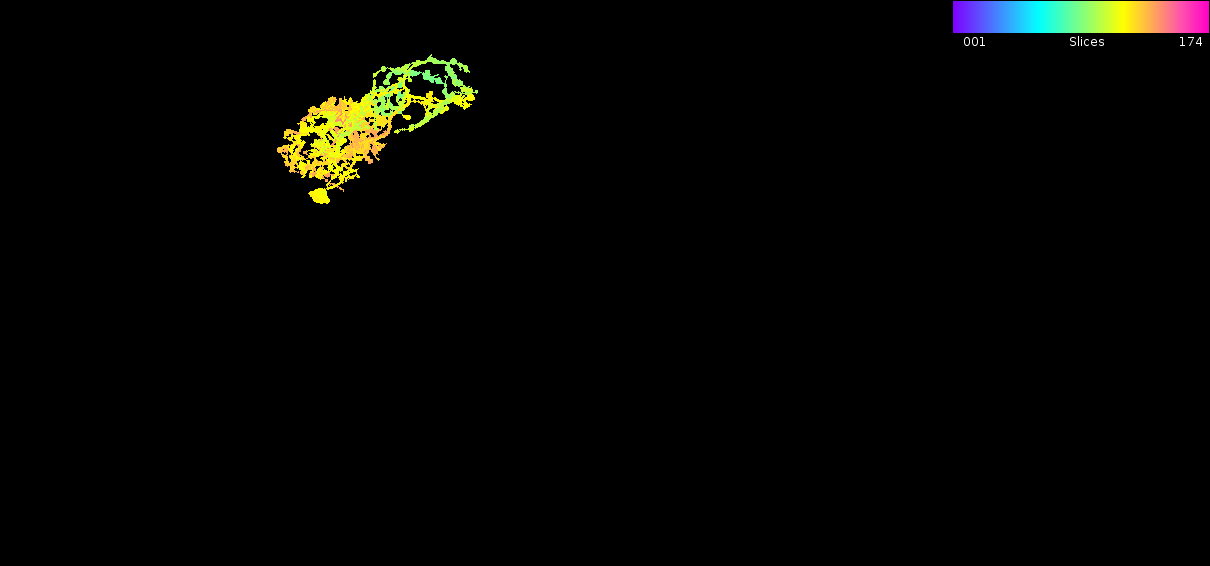

In [12]:



client = Client()
line_obj = client.find_lm_line('LH1000')
image_id = line_obj['results'][0]['id']
matches = client.get_cds_matches(image_id)
matches
client.get_image_for_match(matches['results'][0])

